In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
# Load the training data
X_train = np.load('./X_train.npy')
y_train = np.load('./y_train.npy')

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Prepare the data - N training examples, 4 channels (muscle groups) per example, each 100 timesteps long
X_train = X_train.reshape(-1, 4, 100)
X_test = X_test.reshape(-1, 4, 100)

print(f"X_train.shape: {X_train.shape} - {X_train.shape[0]} training examples")
print(f"X_test.shape: {X_test.shape} - {X_test.shape[0]} testing examples")

X_train.shape: (226, 4, 100) - 226 training examples
X_test.shape: (57, 4, 100) - 57 testing examples


In [34]:
model = tf.keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(4, 100)),
    layers.Conv1D(64, 1, activation='relu'),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 2, 32)             9632      
                                                                 
 conv1d_15 (Conv1D)          (None, 2, 64)             2112      
                                                                 
 lstm_10 (LSTM)              (None, 2, 128)            98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 6)                 390       
                                                                 
Total params: 164,518
Trainable params: 164,518
Non-tr

In [35]:
# Define Early Stopping callback
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    mode='max',
    restore_best_weights=True
)

In [36]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=1000,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

Epoch 1/1000
8/8 [==============================] - 6s 173ms/step - loss: 1.7884 - accuracy: 0.1504 - val_loss: 1.7770 - val_accuracy: 0.1579
Epoch 2/1000
8/8 [==============================] - 0s 17ms/step - loss: 1.7658 - accuracy: 0.1814 - val_loss: 1.7644 - val_accuracy: 0.1579
Epoch 3/1000
8/8 [==============================] - 0s 23ms/step - loss: 1.7460 - accuracy: 0.1814 - val_loss: 1.7468 - val_accuracy: 0.1930
Epoch 4/1000
8/8 [==============================] - 0s 19ms/step - loss: 1.7194 - accuracy: 0.2080 - val_loss: 1.6978 - val_accuracy: 0.1754
Epoch 5/1000
8/8 [==============================] - 0s 20ms/step - loss: 1.6418 - accuracy: 0.3186 - val_loss: 1.5692 - val_accuracy: 0.6140
Epoch 6/1000
8/8 [==============================] - 0s 18ms/step - loss: 1.4837 - accuracy: 0.5221 - val_loss: 1.3190 - val_accuracy: 0.5088
Epoch 7/1000
8/8 [==============================] - 0s 18ms/step - loss: 1.2449 - accuracy: 0.5487 - val_loss: 1.0961 - val_accuracy: 0.6491
Epoch 8/1000

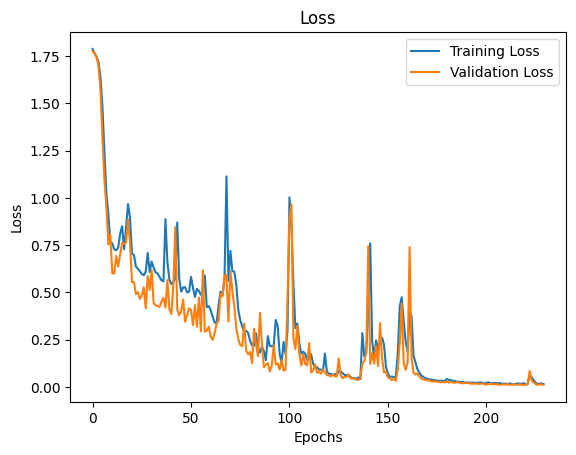

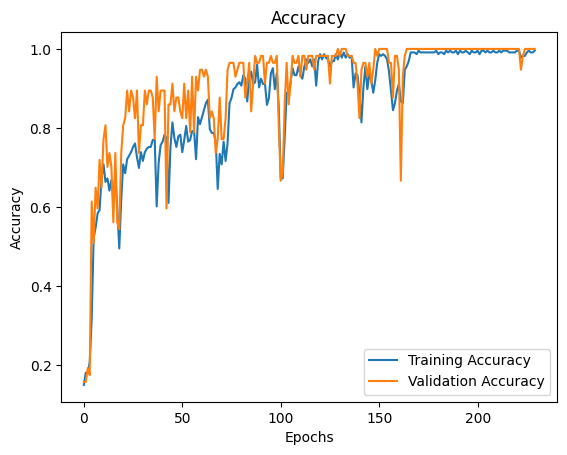

In [37]:
# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()